<a href="https://colab.research.google.com/github/evmpython/ERA5/blob/main/06_ERA5_arco_era5_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Maiores Informações: https://github.com/google-research/arco-era5?tab=readme-ov-file

# Instalações necessárias

In [1]:
!pip install -q zarr gcsfs
import time
import xarray as xr
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.9/203.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.9 MB/s eta 0:00:00


# Carregandos os dados
- 0.25° Pressure and Surface Level Data
-
This dataset contains most pressure-level fields and all surface-level field regridded to a uniform 0.25° resolution. It is a superset of the data used to train GraphCast and NeuralGCM.

In [2]:
# carrega os dados
era5_3d_1h = xr.open_zarr('gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
                          chunks=None,
                          storage_options=dict(token='anon'))

# transforma longitude de 0-360 graus para -180-180 graus
era5_3d_1h.coords['longitude'] = ((era5_3d_1h.coords['longitude'] + 180) % 360) - 180
era5_3d_1h = era5_3d_1h.sortby(era5_3d_1h.longitude)

# mostra os dados
era5_3d_1h

<xarray.Dataset> Size: 4PB
Dimensions:                                                          (
                                                                      time: 1323648,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 3kB ...
  * level                                                            (level) int64 296B ...
  * time                                                             (time) datetime64[ns] 11MB ...
  * longitude                                                        (longitude) float32 6kB ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 5TB ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 5TB ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 5TB ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 5TB ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 5TB ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 5TB ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 5TB ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 5TB ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 5TB ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 5TB ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 5TB ...
    zero_degree_level                                                (time, latitude, longitude) float32 5TB ...
Attributes:
    last_updated:           2025-05-06 02:12:49.898331+00:00
    valid_time_start:       1940-01-01
    valid_time_stop:        2025-01-31
    valid_time_stop_era5t:  2025-04-30

# Variáveis e tempos disponíveis

In [3]:
# variáveis
era5_3d_1h.data_vars

Data variables:
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 5TB ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 5TB ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 5TB ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 5TB ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 5TB ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 5TB ...
    10m_wind_gust_since_previous_post_processing                     (time, latitude, longitude) float32 5TB ...
    2m_dewpoint_temperature                                          (time, latitude, longitude) float32 5TB ...
    2m_temperature                                                   (time, lati

In [4]:
# quantidade de variáveis disponível
len(era5_3d_1h.data_vars)

273

In [5]:
# tempo
era5_3d_1h.time

<xarray.DataArray 'time' (time: 1323648)> Size: 11MB
array(['1900-01-01T00:00:00.000000000', '1900-01-01T01:00:00.000000000',
       '1900-01-01T02:00:00.000000000', ..., '2050-12-31T21:00:00.000000000',
       '2050-12-31T22:00:00.000000000', '2050-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 11MB 1900-01-01 ... 2050-12-31T23:00:00

# Mapas simples

In [6]:
# acessando o CAPE
era5_3d_1h['convective_available_potential_energy']

<xarray.DataArray 'convective_available_potential_energy' (time: 1323648,
                                                           latitude: 721,
                                                           longitude: 1440)> Size: 5TB
[1374264299520 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 11MB 1900-01-01 ... 2050-12-31T23:00:00
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes:
    long_name:   Convective available potential energy
    short_name:  cape
    units:       J kg**-1

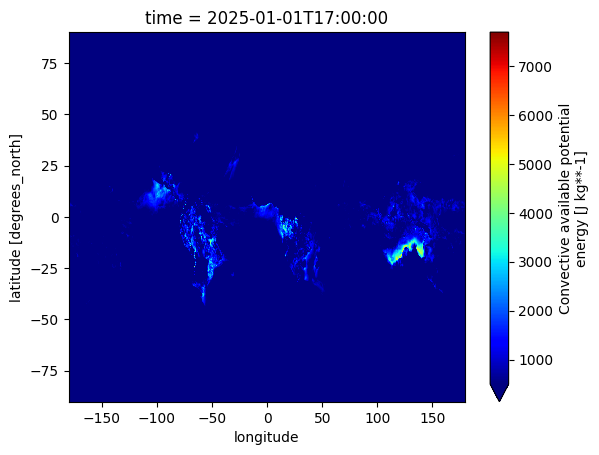

In [7]:
# mapa de CAPE para uma DATA específica: 1 de janeiro de 2025 às 17 UTC
era5_3d_1h['convective_available_potential_energy'].sel(time='2025-01-01T17').plot(vmin=500, cmap='jet')

In [8]:
# instalando o salem para recortar os dados para o Brasil
!pip install -q salem rasterio
import salem
shapefile_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.0 MB/s eta 0:00:00


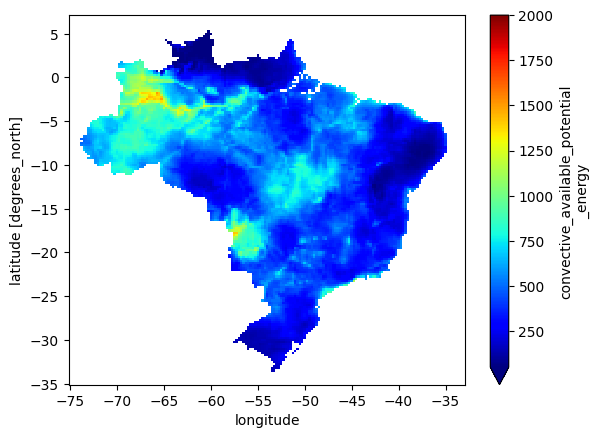

In [9]:
# mapa de CAPE para o mês de "JANEIRO" para o "BRASIL"
era5_3d_1h['convective_available_potential_energy'].sel(time=slice('2025-01-01','2025-01-31'),
                                                        longitude=slice(-75.0, -33.0),
                                                        latitude=slice(7, -35)).mean('time').salem.roi(shape=shapefile_brasil).plot(vmin=50., vmax=2000, cmap='jet')

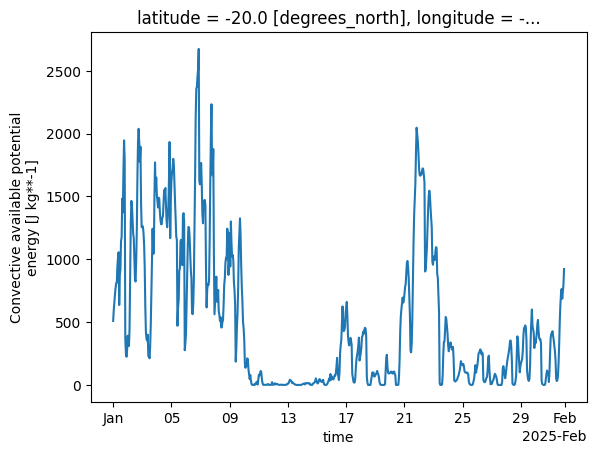

In [10]:
# extrai a SÉRIE TEMPORAL de CAPE para uma localidade
rec = era5_3d_1h['convective_available_potential_energy'].sel(time=slice('2025-01-01','2025-01-31'))

rec.sel(longitude=-40,
        latitude=-20.0,
        method='nearest').plot()